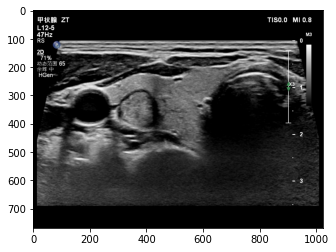

In [1]:
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('/root/workspace/Thyroid_Solid_Nodule/data/preprocess/chenzhou_aug/tests/A4B1C2D1E1_20235241120181012THY14920181012112622945T.jpg')
# plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.show()

In [2]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector
from mmcv import Config
import copy
import os.path as osp
import os
import mmcv
import numpy as np
import time

os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2,3,4,5"

cfg = Config.fromfile('./configs/mask_rcnn/mask_rcnn_r50_fpn_1x_chenzhou.py')
cfg.work_dir = 'logs/mask_rcnn_r50_fpn_1x_chenzhou_' + time.strftime("%Y%m%d%H%M", time.localtime()) + '/'
cfg.gpu_ids = range(1)
cfg.seed = 0
cfg.total_epochs = 12
cfg.log_config.interval = 1000
# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(
    cfg.model, train_cfg=cfg.train_cfg, test_cfg=cfg.test_cfg)
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

loading annotations into memory...
Done (t=0.41s)
creating index...
index created!


2020-09-08 11:02:34,681 - mmdet - INFO - load model from: torchvision://resnet50
2020-09-08 11:02:34,974 - mmdet - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

2020-09-08 11:02:38,140 - mmdet - INFO - Start running, host: root@358d280dcc22, work_dir: /root/workspace/Thyroid_Solid_Nodule/code/mmdetection/logs/mask_rcnn_r50_fpn_1x_chenzhou_202009081102
2020-09-08 11:02:38,141 - mmdet - INFO - workflow: [('train', 1)], max: 12 epochs


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


2020-09-08 11:12:07,521 - mmdet - INFO - Epoch [1][1000/6332]	lr: 2.000e-02, eta: 11:51:23, time: 0.569, data_time: 0.014, memory: 3199, loss_rpn_cls: 0.0514, loss_rpn_bbox: 0.0089, loss_cls: 0.1145, acc: 97.7561, loss_bbox: 0.0617, loss_mask: 0.4843, loss: 0.7208
2020-09-08 11:21:40,719 - mmdet - INFO - Epoch [1][2000/6332]	lr: 2.000e-02, eta: 11:44:20, time: 0.573, data_time: 0.012, memory: 3199, loss_rpn_cls: 0.0146, loss_rpn_bbox: 0.0076, loss_cls: 0.1000, acc: 96.8026, loss_bbox: 0.0974, loss_mask: 0.3312, loss: 0.5508
2020-09-08 11:31:17,146 - mmdet - INFO - Epoch [1][3000/6332]	lr: 2.000e-02, eta: 11:36:56, time: 0.576, data_time: 0.013, memory: 3199, loss_rpn_cls: 0.0103, loss_rpn_bbox: 0.0065, loss_cls: 0.0841, acc: 97.0728, loss_bbox: 0.0903, loss_mask: 0.2916, loss: 0.4828
2020-09-08 11:40:55,547 - mmdet - INFO - Epoch [1][4000/6332]	lr: 2.000e-02, eta: 11:29:01, time: 0.578, data_time: 0.013, memory: 3199, loss_rpn_cls: 0.0095, loss_rpn_bbox: 0.0062, loss_cls: 0.0730, acc: 

[>>>>                              ] 2/15, 4.8 task/s, elapsed: 0s, ETA:     3s

/root/workspace/Thyroid_Solid_Nodule/code/mmdetection/mmdet/core/post_processing/bbox_nms.py:52: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629416375/work/torch/csrc/utils/python_arg_parser.cpp:766.)
  labels = valid_mask.nonzero()[:, 1]


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 7.0 task/s, elapsed: 2s, ETA:     0s

2020-09-08 12:03:20,156 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2020-09-08 12:03:20,193 - mmdet - INFO - Evaluating segm...
2020-09-08 12:03:20,230 - mmdet - INFO - Epoch [1][6332/6332]	lr: 2.000e-02, bbox_mAP: 0.4570, bbox_mAP_50: 0.8360, bbox_mAP_75: 0.4450, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.3860, bbox_mAP_l: 0.4890, bbox_mAP_copypaste: 0.457 0.836 0.445 -1.000 0.386 0.489, segm_mAP: 0.4530, segm_mAP_50: 0.8160, segm_mAP_75: 0.4770, segm_mAP_s: -1.0000, segm_mAP_m: 0.3770, segm_mAP_l: 0.4830, segm_mAP_copypaste: 0.453 0.816 0.477 -1.000 0.377 0.483


DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.457
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.836
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.445
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.386
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.489
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.539
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.539
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.539
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.580
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large

2020-09-08 12:12:58,882 - mmdet - INFO - Epoch [2][1000/6332]	lr: 2.000e-02, eta: 10:28:16, time: 0.579, data_time: 0.014, memory: 3199, loss_rpn_cls: 0.0057, loss_rpn_bbox: 0.0052, loss_cls: 0.0497, acc: 98.0917, loss_bbox: 0.0721, loss_mask: 0.2154, loss: 0.3482
2020-09-08 12:22:33,820 - mmdet - INFO - Epoch [2][2000/6332]	lr: 2.000e-02, eta: 10:22:37, time: 0.575, data_time: 0.013, memory: 3199, loss_rpn_cls: 0.0048, loss_rpn_bbox: 0.0052, loss_cls: 0.0449, acc: 98.2987, loss_bbox: 0.0667, loss_mask: 0.2091, loss: 0.3308
2020-09-08 12:32:05,380 - mmdet - INFO - Epoch [2][3000/6332]	lr: 2.000e-02, eta: 10:15:43, time: 0.572, data_time: 0.013, memory: 3199, loss_rpn_cls: 0.0051, loss_rpn_bbox: 0.0049, loss_cls: 0.0411, acc: 98.4568, loss_bbox: 0.0604, loss_mask: 0.2001, loss: 0.3116
2020-09-08 12:41:40,699 - mmdet - INFO - Epoch [2][4000/6332]	lr: 2.000e-02, eta: 10:08:42, time: 0.575, data_time: 0.012, memory: 3199, loss_rpn_cls: 0.0042, loss_rpn_bbox: 0.0049, loss_cls: 0.0378, acc: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 7.1 task/s, elapsed: 2s, ETA:     0s

2020-09-08 13:04:05,782 - mmdet - INFO - Evaluating bbox...
2020-09-08 13:04:05,817 - mmdet - INFO - Evaluating segm...
2020-09-08 13:04:05,853 - mmdet - INFO - Epoch [2][6332/6332]	lr: 2.000e-02, bbox_mAP: 0.5290, bbox_mAP_50: 0.8660, bbox_mAP_75: 0.6240, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.3290, bbox_mAP_l: 0.6310, bbox_mAP_copypaste: 0.529 0.866 0.624 -1.000 0.329 0.631, segm_mAP: 0.4980, segm_mAP_50: 0.8660, segm_mAP_75: 0.5580, segm_mAP_s: -1.0000, segm_mAP_m: 0.2820, segm_mAP_l: 0.6140, segm_mAP_copypaste: 0.498 0.866 0.558 -1.000 0.282 0.614


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.529
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.866
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.624
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.329
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.631
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.628
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.628
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.628
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-08 13:13:42,591 - mmdet - INFO - Epoch [3][1000/6332]	lr: 2.000e-02, eta: 9:28:16, time: 0.577, data_time: 0.014, memory: 3199, loss_rpn_cls: 0.0030, loss_rpn_bbox: 0.0041, loss_cls: 0.0294, acc: 98.8500, loss_bbox: 0.0508, loss_mask: 0.1583, loss: 0.2456
2020-09-08 13:23:18,215 - mmdet - INFO - Epoch [3][2000/6332]	lr: 2.000e-02, eta: 9:21:08, time: 0.576, data_time: 0.013, memory: 3199, loss_rpn_cls: 0.0023, loss_rpn_bbox: 0.0041, loss_cls: 0.0282, acc: 98.8839, loss_bbox: 0.0507, loss_mask: 0.1556, loss: 0.2409
2020-09-08 13:32:55,510 - mmdet - INFO - Epoch [3][3000/6332]	lr: 2.000e-02, eta: 9:13:47, time: 0.577, data_time: 0.013, memory: 3199, loss_rpn_cls: 0.0021, loss_rpn_bbox: 0.0040, loss_cls: 0.0280, acc: 98.9048, loss_bbox: 0.0514, loss_mask: 0.1560, loss: 0.2415
2020-09-08 13:42:30,324 - mmdet - INFO - Epoch [3][4000/6332]	lr: 2.000e-02, eta: 9:06:02, time: 0.575, data_time: 0.013, memory: 3199, loss_rpn_cls: 0.0038, loss_rpn_bbox: 0.0041, loss_cls: 0.0255, acc: 99.0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 7.5 task/s, elapsed: 2s, ETA:     0s

2020-09-08 14:05:00,775 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2020-09-08 14:05:00,804 - mmdet - INFO - Evaluating segm...
2020-09-08 14:05:00,831 - mmdet - INFO - Epoch [3][6332/6332]	lr: 2.000e-02, bbox_mAP: 0.4580, bbox_mAP_50: 0.8040, bbox_mAP_75: 0.5780, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.3540, bbox_mAP_l: 0.4980, bbox_mAP_copypaste: 0.458 0.804 0.578 -1.000 0.354 0.498, segm_mAP: 0.4510, segm_mAP_50: 0.8040, segm_mAP_75: 0.5920, segm_mAP_s: -1.0000, segm_mAP_m: 0.3430, segm_mAP_l: 0.4860, segm_mAP_copypaste: 0.451 0.804 0.592 -1.000 0.343 0.486


DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.458
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.804
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.578
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.354
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.498
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.460
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large

2020-09-08 14:14:37,321 - mmdet - INFO - Epoch [4][1000/6332]	lr: 2.000e-02, eta: 8:30:19, time: 0.576, data_time: 0.015, memory: 3199, loss_rpn_cls: 0.0022, loss_rpn_bbox: 0.0039, loss_cls: 0.0254, acc: 99.0086, loss_bbox: 0.0474, loss_mask: 0.1430, loss: 0.2218
2020-09-08 14:24:12,061 - mmdet - INFO - Epoch [4][2000/6332]	lr: 2.000e-02, eta: 8:22:25, time: 0.575, data_time: 0.013, memory: 3199, loss_rpn_cls: 0.0025, loss_rpn_bbox: 0.0037, loss_cls: 0.0217, acc: 99.1271, loss_bbox: 0.0435, loss_mask: 0.1369, loss: 0.2082
2020-09-08 14:33:49,767 - mmdet - INFO - Epoch [4][3000/6332]	lr: 2.000e-02, eta: 8:14:29, time: 0.578, data_time: 0.014, memory: 3199, loss_rpn_cls: 0.0015, loss_rpn_bbox: 0.0033, loss_cls: 0.0210, acc: 99.1443, loss_bbox: 0.0436, loss_mask: 0.1288, loss: 0.1981
2020-09-08 14:43:30,000 - mmdet - INFO - Epoch [4][4000/6332]	lr: 2.000e-02, eta: 8:06:30, time: 0.580, data_time: 0.013, memory: 3199, loss_rpn_cls: 0.0011, loss_rpn_bbox: 0.0032, loss_cls: 0.0215, acc: 99.1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 7.4 task/s, elapsed: 2s, ETA:     0s

2020-09-08 15:06:03,114 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...

2020-09-08 15:06:03,144 - mmdet - INFO - Evaluating segm...
2020-09-08 15:06:03,173 - mmdet - INFO - Epoch [4][6332/6332]	lr: 2.000e-02, bbox_mAP: 0.4710, bbox_mAP_50: 0.8520, bbox_mAP_75: 0.2810, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4190, bbox_mAP_l: 0.5120, bbox_mAP_copypaste: 0.471 0.852 0.281 -1.000 0.419 0.512, segm_mAP: 0.4430, segm_mAP_50: 0.8520, segm_mAP_75: 0.4210, segm_mAP_s: -1.0000, segm_mAP_m: 0.3460, segm_mAP_l: 0.5090, segm_mAP_copypaste: 0.443 0.852 0.421 -1.000 0.346 0.509



Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.471
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.852
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.281
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.419
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.512
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.533
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.500
Average Recall     (A

2020-09-08 15:15:42,250 - mmdet - INFO - Epoch [5][1000/6332]	lr: 2.000e-02, eta: 7:32:49, time: 0.579, data_time: 0.015, memory: 3199, loss_rpn_cls: 0.0012, loss_rpn_bbox: 0.0031, loss_cls: 0.0181, acc: 99.2673, loss_bbox: 0.0395, loss_mask: 0.1219, loss: 0.1838
2020-09-08 15:25:19,372 - mmdet - INFO - Epoch [5][2000/6332]	lr: 2.000e-02, eta: 7:24:35, time: 0.577, data_time: 0.013, memory: 3199, loss_rpn_cls: 0.0012, loss_rpn_bbox: 0.0032, loss_cls: 0.0196, acc: 99.2127, loss_bbox: 0.0400, loss_mask: 0.1226, loss: 0.1866
2020-09-08 15:34:54,700 - mmdet - INFO - Epoch [5][3000/6332]	lr: 2.000e-02, eta: 7:16:12, time: 0.575, data_time: 0.013, memory: 3199, loss_rpn_cls: 0.0031, loss_rpn_bbox: 0.0036, loss_cls: 0.0229, acc: 99.1113, loss_bbox: 0.0424, loss_mask: 0.1410, loss: 0.2130
2020-09-08 15:44:34,386 - mmdet - INFO - Epoch [5][4000/6332]	lr: 2.000e-02, eta: 7:07:52, time: 0.580, data_time: 0.013, memory: 3199, loss_rpn_cls: 0.0016, loss_rpn_bbox: 0.0033, loss_cls: 0.0242, acc: 99.0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 7.3 task/s, elapsed: 2s, ETA:     0s

2020-09-08 16:07:02,110 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*

2020-09-08 16:07:02,140 - mmdet - INFO - Evaluating segm...
2020-09-08 16:07:02,170 - mmdet - INFO - Epoch [5][6332/6332]	lr: 2.000e-02, bbox_mAP: 0.4780, bbox_mAP_50: 0.8020, bbox_mAP_75: 0.5680, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.5470, bbox_mAP_l: 0.4740, bbox_mAP_copypaste: 0.478 0.802 0.568 -1.000 0.547 0.474, segm_mAP: 0.4570, segm_mAP_50: 0.7360, segm_mAP_75: 0.5320, segm_mAP_s: -1.0000, segm_mAP_m: 0.5040, segm_mAP_l: 0.4570, segm_mAP_copypaste: 0.457 0.736 0.532 -1.000 0.504 0.457



DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.478
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.802
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.568
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.547
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.474
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.578
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.578
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.578
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.720
Average Recall     (AR) @[ IoU=0.50:0.95 | area= larg

2020-09-08 16:16:40,582 - mmdet - INFO - Epoch [6][1000/6332]	lr: 2.000e-02, eta: 6:35:04, time: 0.578, data_time: 0.014, memory: 3199, loss_rpn_cls: 0.0021, loss_rpn_bbox: 0.0033, loss_cls: 0.0178, acc: 99.3058, loss_bbox: 0.0387, loss_mask: 0.1185, loss: 0.1805
2020-09-08 16:26:17,486 - mmdet - INFO - Epoch [6][2000/6332]	lr: 2.000e-02, eta: 6:26:34, time: 0.577, data_time: 0.012, memory: 3199, loss_rpn_cls: 0.0015, loss_rpn_bbox: 0.0032, loss_cls: 0.0236, acc: 99.0739, loss_bbox: 0.0441, loss_mask: 0.1299, loss: 0.2023
2020-09-08 16:35:57,058 - mmdet - INFO - Epoch [6][3000/6332]	lr: 2.000e-02, eta: 6:18:03, time: 0.580, data_time: 0.012, memory: 3199, loss_rpn_cls: 0.0015, loss_rpn_bbox: 0.0031, loss_cls: 0.0243, acc: 99.0312, loss_bbox: 0.0453, loss_mask: 0.1289, loss: 0.2031
2020-09-08 16:45:34,311 - mmdet - INFO - Epoch [6][4000/6332]	lr: 2.000e-02, eta: 6:09:27, time: 0.577, data_time: 0.012, memory: 3199, loss_rpn_cls: 0.0015, loss_rpn_bbox: 0.0031, loss_cls: 0.0195, acc: 99.2

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 7.2 task/s, elapsed: 2s, ETA:     0s

2020-09-08 17:08:06,500 - mmdet - INFO - Evaluating bbox...
2020-09-08 17:08:06,533 - mmdet - INFO - Evaluating segm...
2020-09-08 17:08:06,564 - mmdet - INFO - Epoch [6][6332/6332]	lr: 2.000e-02, bbox_mAP: 0.4860, bbox_mAP_50: 0.8660, bbox_mAP_75: 0.5820, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4090, bbox_mAP_l: 0.5560, bbox_mAP_copypaste: 0.486 0.866 0.582 -1.000 0.409 0.556, segm_mAP: 0.4910, segm_mAP_50: 0.8660, segm_mAP_75: 0.5820, segm_mAP_s: -1.0000, segm_mAP_m: 0.4020, segm_mAP_l: 0.5710, segm_mAP_copypaste: 0.491 0.866 0.582 -1.000 0.402 0.571


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.486
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.866
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.582
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.409
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.556
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.606
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.606
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.606
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-08 17:17:51,628 - mmdet - INFO - Epoch [7][1000/6332]	lr: 2.000e-02, eta: 5:37:30, time: 0.585, data_time: 0.015, memory: 3199, loss_rpn_cls: 0.0006, loss_rpn_bbox: 0.0027, loss_cls: 0.0160, acc: 99.3409, loss_bbox: 0.0365, loss_mask: 0.1029, loss: 0.1587
2020-09-08 17:27:37,303 - mmdet - INFO - Epoch [7][2000/6332]	lr: 2.000e-02, eta: 5:28:57, time: 0.586, data_time: 0.013, memory: 3199, loss_rpn_cls: 0.0013, loss_rpn_bbox: 0.0028, loss_cls: 0.0169, acc: 99.3182, loss_bbox: 0.0370, loss_mask: 0.1072, loss: 0.1653
2020-09-08 17:37:13,623 - mmdet - INFO - Epoch [7][3000/6332]	lr: 2.000e-02, eta: 5:20:12, time: 0.576, data_time: 0.013, memory: 3199, loss_rpn_cls: 0.0018, loss_rpn_bbox: 0.0028, loss_cls: 0.0160, acc: 99.3562, loss_bbox: 0.0354, loss_mask: 0.1103, loss: 0.1663
2020-09-08 17:46:50,304 - mmdet - INFO - Epoch [7][4000/6332]	lr: 2.000e-02, eta: 5:11:26, time: 0.577, data_time: 0.013, memory: 3199, loss_rpn_cls: 0.0009, loss_rpn_bbox: 0.0027, loss_cls: 0.0157, acc: 99.3

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 7.5 task/s, elapsed: 2s, ETA:     0s

2020-09-08 18:09:20,967 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.499
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.870
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.437
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.410
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.537
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.572
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.572


2020-09-08 18:09:20,996 - mmdet - INFO - Evaluating segm...
2020-09-08 18:09:21,025 - mmdet - INFO - Epoch [7][6332/6332]	lr: 2.000e-02, bbox_mAP: 0.4990, bbox_mAP_50: 0.8700, bbox_mAP_75: 0.4370, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4100, bbox_mAP_l: 0.5370, bbox_mAP_copypaste: 0.499 0.870 0.437 -1.000 0.410 0.537, segm_mAP: 0.4970, segm_mAP_50: 0.8700, segm_mAP_75: 0.5190, segm_mAP_s: -1.0000, segm_mAP_m: 0.3840, segm_mAP_l: 0.5410, segm_mAP_copypaste: 0.497 0.870 0.519 -1.000 0.384 0.541


Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.572
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.480
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.608
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.497
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.870
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.519
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.384
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=10

2020-09-08 18:19:00,249 - mmdet - INFO - Epoch [8][1000/6332]	lr: 2.000e-02, eta: 4:39:48, time: 0.579, data_time: 0.016, memory: 3199, loss_rpn_cls: 0.0018, loss_rpn_bbox: 0.0029, loss_cls: 0.0175, acc: 99.3097, loss_bbox: 0.0359, loss_mask: 0.1093, loss: 0.1673
2020-09-08 18:28:39,493 - mmdet - INFO - Epoch [8][2000/6332]	lr: 2.000e-02, eta: 4:31:01, time: 0.579, data_time: 0.014, memory: 3199, loss_rpn_cls: 0.0014, loss_rpn_bbox: 0.0029, loss_cls: 0.0174, acc: 99.3051, loss_bbox: 0.0375, loss_mask: 0.1144, loss: 0.1735
2020-09-08 18:38:13,420 - mmdet - INFO - Epoch [8][3000/6332]	lr: 2.000e-02, eta: 4:22:08, time: 0.574, data_time: 0.014, memory: 3199, loss_rpn_cls: 0.0010, loss_rpn_bbox: 0.0028, loss_cls: 0.0163, acc: 99.3397, loss_bbox: 0.0344, loss_mask: 0.1061, loss: 0.1607
2020-09-08 18:47:53,136 - mmdet - INFO - Epoch [8][4000/6332]	lr: 2.000e-02, eta: 4:13:17, time: 0.580, data_time: 0.014, memory: 3199, loss_rpn_cls: 0.0014, loss_rpn_bbox: 0.0028, loss_cls: 0.0176, acc: 99.2

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 6.9 task/s, elapsed: 2s, ETA:     0s

2020-09-08 19:10:22,368 - mmdet - INFO - Evaluating bbox...
2020-09-08 19:10:22,404 - mmdet - INFO - Evaluating segm...
2020-09-08 19:10:22,443 - mmdet - INFO - Epoch [8][6332/6332]	lr: 2.000e-02, bbox_mAP: 0.4480, bbox_mAP_50: 0.7740, bbox_mAP_75: 0.5020, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4640, bbox_mAP_l: 0.4470, bbox_mAP_copypaste: 0.448 0.774 0.502 -1.000 0.464 0.447, segm_mAP: 0.4410, segm_mAP_50: 0.7740, segm_mAP_75: 0.4860, segm_mAP_s: -1.0000, segm_mAP_m: 0.4140, segm_mAP_l: 0.4520, segm_mAP_copypaste: 0.441 0.774 0.486 -1.000 0.414 0.452


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.448
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.774
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.502
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.464
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.447
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.567
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.567
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.567
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-08 19:20:06,411 - mmdet - INFO - Epoch [9][1000/6332]	lr: 2.000e-03, eta: 3:42:03, time: 0.584, data_time: 0.015, memory: 3199, loss_rpn_cls: 0.0016, loss_rpn_bbox: 0.0024, loss_cls: 0.0169, acc: 99.3180, loss_bbox: 0.0343, loss_mask: 0.1073, loss: 0.1624
2020-09-08 19:29:44,016 - mmdet - INFO - Epoch [9][2000/6332]	lr: 2.000e-03, eta: 3:33:08, time: 0.578, data_time: 0.013, memory: 3199, loss_rpn_cls: 0.0006, loss_rpn_bbox: 0.0019, loss_cls: 0.0127, acc: 99.4817, loss_bbox: 0.0282, loss_mask: 0.0927, loss: 0.1360
2020-09-08 19:39:23,748 - mmdet - INFO - Epoch [9][3000/6332]	lr: 2.000e-03, eta: 3:24:13, time: 0.580, data_time: 0.013, memory: 3199, loss_rpn_cls: 0.0011, loss_rpn_bbox: 0.0019, loss_cls: 0.0123, acc: 99.5088, loss_bbox: 0.0266, loss_mask: 0.0897, loss: 0.1317
2020-09-08 19:49:03,785 - mmdet - INFO - Epoch [9][4000/6332]	lr: 2.000e-03, eta: 3:15:17, time: 0.580, data_time: 0.013, memory: 3199, loss_rpn_cls: 0.0004, loss_rpn_bbox: 0.0017, loss_cls: 0.0111, acc: 99.5

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 7.4 task/s, elapsed: 2s, ETA:     0s

2020-09-08 20:11:41,058 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...


2020-09-08 20:11:41,090 - mmdet - INFO - Evaluating segm...
2020-09-08 20:11:41,120 - mmdet - INFO - Epoch [9][6332/6332]	lr: 2.000e-03, bbox_mAP: 0.5040, bbox_mAP_50: 0.8250, bbox_mAP_75: 0.5550, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4250, bbox_mAP_l: 0.5380, bbox_mAP_copypaste: 0.504 0.825 0.555 -1.000 0.425 0.538, segm_mAP: 0.5090, segm_mAP_50: 0.8250, segm_mAP_75: 0.6540, segm_mAP_s: -1.0000, segm_mAP_m: 0.3820, segm_mAP_l: 0.5610, segm_mAP_copypaste: 0.509 0.825 0.654 -1.000 0.382 0.561


DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.504
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.825
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.555
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.425
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.538
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.567
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.567
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.567
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.540
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.577
Loading and preparing res

2020-09-08 20:21:21,959 - mmdet - INFO - Epoch [10][1000/6332]	lr: 2.000e-03, eta: 2:44:18, time: 0.581, data_time: 0.015, memory: 3199, loss_rpn_cls: 0.0003, loss_rpn_bbox: 0.0016, loss_cls: 0.0100, acc: 99.5850, loss_bbox: 0.0225, loss_mask: 0.0814, loss: 0.1158
2020-09-08 20:31:02,962 - mmdet - INFO - Epoch [10][2000/6332]	lr: 2.000e-03, eta: 2:35:20, time: 0.581, data_time: 0.013, memory: 3199, loss_rpn_cls: 0.0003, loss_rpn_bbox: 0.0015, loss_cls: 0.0098, acc: 99.5932, loss_bbox: 0.0220, loss_mask: 0.0785, loss: 0.1121
2020-09-08 20:40:43,795 - mmdet - INFO - Epoch [10][3000/6332]	lr: 2.000e-03, eta: 2:26:20, time: 0.581, data_time: 0.014, memory: 3199, loss_rpn_cls: 0.0004, loss_rpn_bbox: 0.0015, loss_cls: 0.0101, acc: 99.5929, loss_bbox: 0.0219, loss_mask: 0.0792, loss: 0.1131
2020-09-08 20:50:24,149 - mmdet - INFO - Epoch [10][4000/6332]	lr: 2.000e-03, eta: 2:17:19, time: 0.580, data_time: 0.014, memory: 3199, loss_rpn_cls: 0.0008, loss_rpn_bbox: 0.0015, loss_cls: 0.0099, acc: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 7.3 task/s, elapsed: 2s, ETA:     0s

2020-09-08 21:13:01,672 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...


2020-09-08 21:13:01,702 - mmdet - INFO - Evaluating segm...
2020-09-08 21:13:01,733 - mmdet - INFO - Epoch [10][6332/6332]	lr: 2.000e-03, bbox_mAP: 0.5200, bbox_mAP_50: 0.8140, bbox_mAP_75: 0.6420, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.3950, bbox_mAP_l: 0.5650, bbox_mAP_copypaste: 0.520 0.814 0.642 -1.000 0.395 0.565, segm_mAP: 0.5130, segm_mAP_50: 0.8140, segm_mAP_75: 0.6420, segm_mAP_s: -1.0000, segm_mAP_m: 0.3520, segm_mAP_l: 0.5740, segm_mAP_copypaste: 0.513 0.814 0.642 -1.000 0.352 0.574


Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.520
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.814
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.642
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.395
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.565
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.583
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.583
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.583
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.520
Average Recall     (AR

2020-09-08 21:22:43,321 - mmdet - INFO - Epoch [11][1000/6332]	lr: 2.000e-03, eta: 1:46:32, time: 0.581, data_time: 0.014, memory: 3199, loss_rpn_cls: 0.0004, loss_rpn_bbox: 0.0014, loss_cls: 0.0085, acc: 99.6438, loss_bbox: 0.0195, loss_mask: 0.0764, loss: 0.1062
2020-09-08 21:32:22,944 - mmdet - INFO - Epoch [11][2000/6332]	lr: 2.000e-03, eta: 1:37:29, time: 0.580, data_time: 0.012, memory: 3199, loss_rpn_cls: 0.0007, loss_rpn_bbox: 0.0014, loss_cls: 0.0091, acc: 99.6323, loss_bbox: 0.0198, loss_mask: 0.0782, loss: 0.1092
2020-09-08 21:42:02,774 - mmdet - INFO - Epoch [11][3000/6332]	lr: 2.000e-03, eta: 1:28:25, time: 0.580, data_time: 0.012, memory: 3199, loss_rpn_cls: 0.0003, loss_rpn_bbox: 0.0014, loss_cls: 0.0084, acc: 99.6561, loss_bbox: 0.0193, loss_mask: 0.0764, loss: 0.1057
2020-09-08 21:51:42,954 - mmdet - INFO - Epoch [11][4000/6332]	lr: 2.000e-03, eta: 1:19:20, time: 0.580, data_time: 0.013, memory: 3199, loss_rpn_cls: 0.0005, loss_rpn_bbox: 0.0014, loss_cls: 0.0084, acc: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 7.4 task/s, elapsed: 2s, ETA:     0s

2020-09-08 22:14:18,900 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.499
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.821
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.648
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.435
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.532


2020-09-08 22:14:18,930 - mmdet - INFO - Evaluating segm...
2020-09-08 22:14:18,959 - mmdet - INFO - Epoch [11][6332/6332]	lr: 2.000e-03, bbox_mAP: 0.4990, bbox_mAP_50: 0.8210, bbox_mAP_75: 0.6480, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4350, bbox_mAP_l: 0.5320, bbox_mAP_copypaste: 0.499 0.821 0.648 -1.000 0.435 0.532, segm_mAP: 0.4740, segm_mAP_50: 0.8210, segm_mAP_75: 0.5910, segm_mAP_s: -1.0000, segm_mAP_m: 0.3820, segm_mAP_l: 0.5170, segm_mAP_copypaste: 0.474 0.821 0.591 -1.000 0.382 0.517


Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.561
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.561
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.561
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.560
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.562
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.474
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.821
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.591
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 

2020-09-08 22:24:02,584 - mmdet - INFO - Epoch [12][1000/6332]	lr: 2.000e-04, eta: 0:48:43, time: 0.583, data_time: 0.014, memory: 3199, loss_rpn_cls: 0.0003, loss_rpn_bbox: 0.0012, loss_cls: 0.0083, acc: 99.6684, loss_bbox: 0.0177, loss_mask: 0.0722, loss: 0.0997
2020-09-08 22:33:41,435 - mmdet - INFO - Epoch [12][2000/6332]	lr: 2.000e-04, eta: 0:39:36, time: 0.579, data_time: 0.012, memory: 3199, loss_rpn_cls: 0.0003, loss_rpn_bbox: 0.0013, loss_cls: 0.0079, acc: 99.6794, loss_bbox: 0.0176, loss_mask: 0.0729, loss: 0.0999
2020-09-08 22:43:21,410 - mmdet - INFO - Epoch [12][3000/6332]	lr: 2.000e-04, eta: 0:30:29, time: 0.580, data_time: 0.013, memory: 3199, loss_rpn_cls: 0.0003, loss_rpn_bbox: 0.0012, loss_cls: 0.0078, acc: 99.6891, loss_bbox: 0.0174, loss_mask: 0.0734, loss: 0.1000
2020-09-08 22:53:01,858 - mmdet - INFO - Epoch [12][4000/6332]	lr: 2.000e-04, eta: 0:21:21, time: 0.580, data_time: 0.013, memory: 3199, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0012, loss_cls: 0.0075, acc: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 7.4 task/s, elapsed: 2s, ETA:     0s

2020-09-08 23:15:36,627 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...

2020-09-08 23:15:36,657 - mmdet - INFO - Evaluating segm...
2020-09-08 23:15:36,686 - mmdet - INFO - Epoch [12][6332/6332]	lr: 2.000e-04, bbox_mAP: 0.5170, bbox_mAP_50: 0.8250, bbox_mAP_75: 0.6530, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.4840, bbox_mAP_l: 0.5420, bbox_mAP_copypaste: 0.517 0.825 0.653 -1.000 0.484 0.542, segm_mAP: 0.4970, segm_mAP_50: 0.8250, segm_mAP_75: 0.5920, segm_mAP_s: -1.0000, segm_mAP_m: 0.4290, segm_mAP_l: 0.5330, segm_mAP_copypaste: 0.497 0.825 0.592 -1.000 0.429 0.533



Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.517
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.825
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.653
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.484
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.542
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.572
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.572
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.572
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.560
Average Recall     (A

In [4]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot
path = '/root/workspace/Thyroid_Solid_Nodule/data/preprocess/chenzhou_aug/tests/'
model.cfg = cfg
for root, dirs, files in os.walk(os.path.abspath(path)):
    for file in files:
        img = mmcv.imread(path + file)
        result = inference_detector(model, img)
        out_img = model.show_result(img, result, score_thr=0.8, show=False)
        print('/root/workspace/Thyroid_Solid_Nodule/code/mmdetection/' + model.cfg.work_dir + '/tests/' + file)
        mmcv.imwrite(mmcv.bgr2rgb(out_img), '/root/workspace/Thyroid_Solid_Nodule/code/mmdetection/' + model.cfg.work_dir + '/tests/' + file)

/root/workspace/Thyroid_Solid_Nodule/code/mmdetection/logs/mask_rcnn_r50_fpn_1x_chenzhou_202009081102//tests/A4B1C2D1E1_20235241120181012THY14920181012112622945T.jpg
/root/workspace/Thyroid_Solid_Nodule/code/mmdetection/logs/mask_rcnn_r50_fpn_1x_chenzhou_202009081102//tests/A4B1C3D1E1_134THY5720180831150957049T.jpg
/root/workspace/Thyroid_Solid_Nodule/code/mmdetection/logs/mask_rcnn_r50_fpn_1x_chenzhou_202009081102//tests/A4B1C2D1E1_103THY4420180822155400562T.jpg
/root/workspace/Thyroid_Solid_Nodule/code/mmdetection/logs/mask_rcnn_r50_fpn_1x_chenzhou_202009081102//tests/A4B1C4D1E1_20851051020181015THY15220181015100613176V.jpg
/root/workspace/Thyroid_Solid_Nodule/code/mmdetection/logs/mask_rcnn_r50_fpn_1x_chenzhou_202009081102//tests/A3B1C2D2E1_16435091520180815THY12020180815151120041T.jpg
/root/workspace/Thyroid_Solid_Nodule/code/mmdetection/logs/mask_rcnn_r50_fpn_1x_chenzhou_202009081102//tests/A1B1C1D2E1_48THY1820180723105605185.jpg
/root/workspace/Thyroid_Solid_Nodule/code/mmdetecti